In [11]:
from domain.algorithm import GeneticAlgorithm
from domain.stop_condition import StopConditionTime
from domain.selector import TournamentSelector
from cuttingstock import Rectangle
from domain.population import Population
from cuttingstock import CuttingStockObservation
from matplotlib import pyplot as plt
from matplotlib import patches
from domain.algorithm import GeneticAlgorithmConfiguration

import math
import pandas as pd

In [3]:
MAX_TIME = 3 * 60
SHORT_TIME = 45
NO_IMPROVEMENT_ITER = 200
POPULATION_SIZE = 100
CROSS_OVER_PROBABILITY_MAX = 0.8
CROSS_OVER_PROBABILITY = 0.7
MUTATION_PROBABILITY = 0.15
MUTATION_PROBABILITY_MAX = 0.35
TOURNAMENT_SIZE = 10
ELITISM_THRESH = 10
ATTEMPTS = 5

In [4]:
def tournament_ga():
    return GeneticAlgorithm(
        StopConditionTime(MAX_TIME),
        TournamentSelector(TOURNAMENT_SIZE, POPULATION_SIZE, ELITISM_THRESH),
        GeneticAlgorithmConfiguration(crossover_proba=CROSS_OVER_PROBABILITY,
                                      mutation_proba=MUTATION_PROBABILITY))

In [5]:
def fetch_rectangles(path: str):
    rects = pd.read_csv(path)
    return [Rectangle(row[1], row[0], row[2]) for _, row in rects.iterrows()]

In [6]:
def initialize_population(available_rectangles: list[Rectangle], r: float):
    return Population(
        [CuttingStockObservation(available_rectangles, r) for _ in range(POPULATION_SIZE)])

In [7]:
def show_observations(observations, r: float, title: str):
    figure, axis = plt.subplots(math.ceil(len(observations) / 3), 3, figsize=(20, 20), sharex=True, sharey=True)
    plt.grid(linestyle='--')

    for j in range(len(observations)):
        ax = axis[j // 3, j % 3]
        ax.set_aspect(1)
        ax.add_artist(plt.Circle((0, 0), r, color='r', fill=False))
        ax.set_xlim(-r * 1.25, r * 1.25)
        ax.set_ylim(-r * 1.25, r * 1.25)

        for rect in observations[j].rectangles:
            rect_img = patches.Rectangle((rect.x, rect.y - rect.height), rect.width, rect.height, edgecolor="b")
            ax.add_patch(rect_img)

        ax.title.set_text(f'score = {observations[j].evaluate()}')

    plt.suptitle(title, fontsize=20)
    plt.show()

In [8]:
def solve(r):
    print(f"Starting solving r{r} ...")

    path = f'data/r{r}.csv'
    ga = tournament_ga()
    population = initialize_population(fetch_rectangles(path), r)

    return ga.run(population)

In [12]:
solution_800 = solve(800)

Starting solving r800 ...
iter: 1, best:400
iter: 2, best:800
iter: 3, best:800
iter: 4, best:1200
iter: 5, best:1200
iter: 6, best:1200
iter: 7, best:1600
iter: 8, best:1600
iter: 9, best:1700
iter: 10, best:1700
iter: 11, best:2000
iter: 12, best:2000
iter: 13, best:2000
iter: 14, best:2000
iter: 15, best:2000
iter: 16, best:2400
iter: 17, best:2600
iter: 18, best:2600
iter: 19, best:2800
iter: 20, best:3200
iter: 21, best:3200
iter: 22, best:3200
iter: 23, best:3600
iter: 24, best:3600
iter: 25, best:4000
iter: 26, best:4000
iter: 27, best:4000
iter: 28, best:4000
iter: 29, best:4400
iter: 30, best:4800
iter: 31, best:4800
iter: 32, best:4800
iter: 33, best:5300
iter: 34, best:5600
iter: 35, best:5600
iter: 36, best:5600
iter: 37, best:5600
iter: 38, best:6000
iter: 39, best:6400
iter: 40, best:6400
iter: 41, best:6400
iter: 42, best:6800
iter: 43, best:7200
iter: 44, best:7200
iter: 45, best:7200
iter: 46, best:7200
iter: 47, best:7600
iter: 48, best:7600
iter: 49, best:7600
iter: 

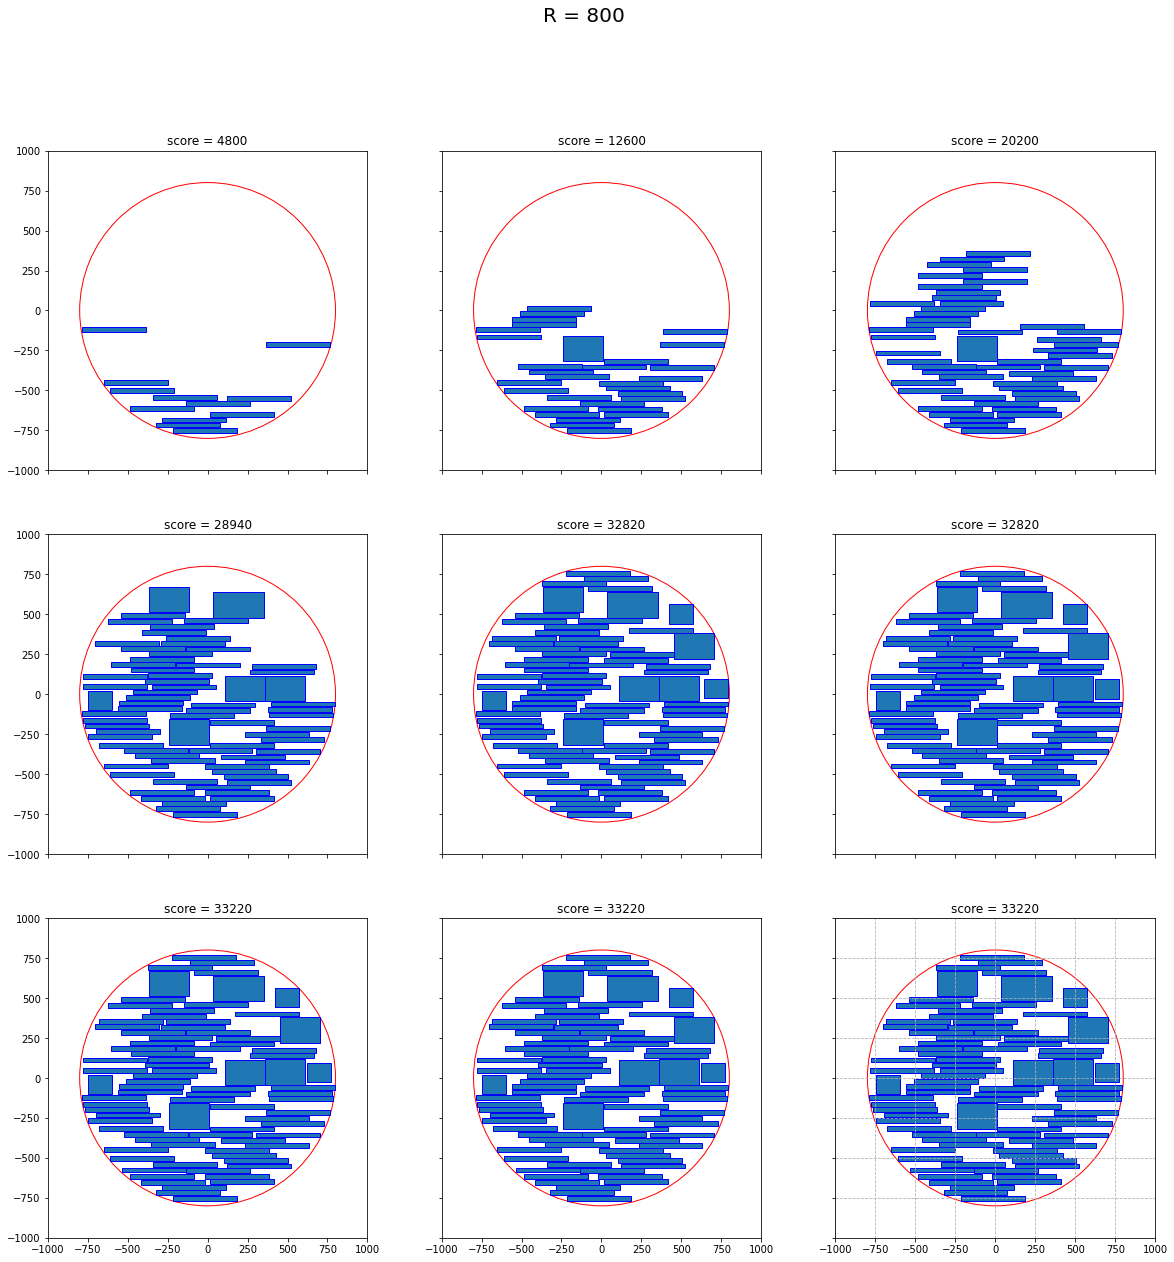

In [14]:
show_observations(solution_800[::2], 800, "R = 800")

In [15]:
solution_1000 = solve(1000)

Starting solving r1000 ...
iter: 1, best:500
iter: 2, best:1000
iter: 3, best:1500
iter: 4, best:2000
iter: 5, best:2000
iter: 6, best:2100
iter: 7, best:2500
iter: 8, best:2500
iter: 9, best:3000
iter: 10, best:3000
iter: 11, best:3500
iter: 12, best:3800
iter: 13, best:3800
iter: 14, best:4000
iter: 15, best:4000
iter: 16, best:4100
iter: 17, best:4600
iter: 18, best:4600
iter: 19, best:4800
iter: 20, best:5100
iter: 21, best:5100
iter: 22, best:5300
iter: 23, best:5800
iter: 24, best:5800
iter: 25, best:5800
iter: 26, best:5800
iter: 27, best:6300
iter: 28, best:6800
iter: 29, best:6800
iter: 30, best:6800
iter: 31, best:7300
iter: 32, best:7300
iter: 33, best:7340
iter: 34, best:7800
iter: 35, best:8300
iter: 36, best:8800
iter: 37, best:8800
iter: 38, best:8800
iter: 39, best:8800
iter: 40, best:8800
iter: 41, best:8800
iter: 42, best:8800
iter: 43, best:9300
iter: 44, best:9300
iter: 45, best:9300
iter: 46, best:9300
iter: 47, best:9300
iter: 48, best:9800
iter: 49, best:9800
ite

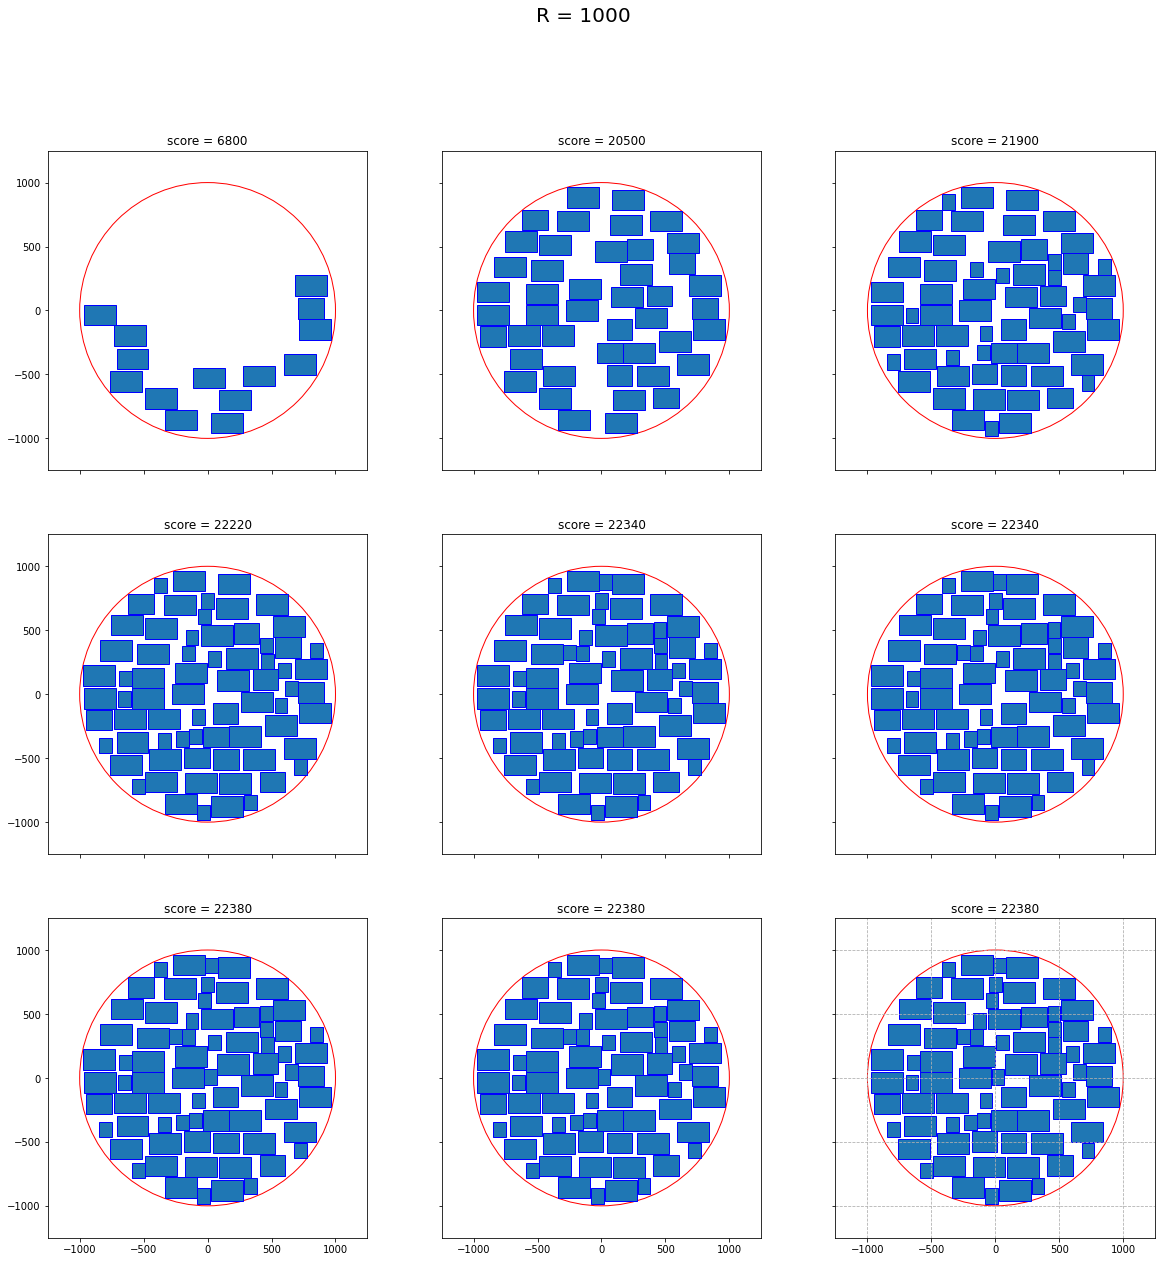

In [19]:
show_observations(solution_1000[::3][:-3], 1000, "R = 1000")

In [20]:
solution_1100 = solve(1100)

Starting solving r1100 ...
iter: 1, best:600
iter: 2, best:600
iter: 3, best:1200
iter: 4, best:1200
iter: 5, best:1800
iter: 6, best:2400
iter: 7, best:2400
iter: 8, best:2400
iter: 9, best:3000
iter: 10, best:3000
iter: 11, best:3600
iter: 12, best:3600
iter: 13, best:4200
iter: 14, best:4200
iter: 15, best:4800
iter: 16, best:4800
iter: 17, best:4800
iter: 18, best:5100
iter: 19, best:5100
iter: 20, best:5400
iter: 21, best:5400
iter: 22, best:5700
iter: 23, best:6000
iter: 24, best:6600
iter: 25, best:6600
iter: 26, best:6600
iter: 27, best:7200
iter: 28, best:7800
iter: 29, best:7800
iter: 30, best:8400
iter: 31, best:8400
iter: 32, best:9000
iter: 33, best:9000
iter: 34, best:9600
iter: 35, best:9600
iter: 36, best:9600
iter: 37, best:9600
iter: 38, best:10200
iter: 39, best:10200
iter: 40, best:10200
iter: 41, best:10200
iter: 42, best:10800
iter: 43, best:11400
iter: 44, best:11400
iter: 45, best:11400
iter: 46, best:12000
iter: 47, best:12000
iter: 48, best:12000
iter: 49, bes

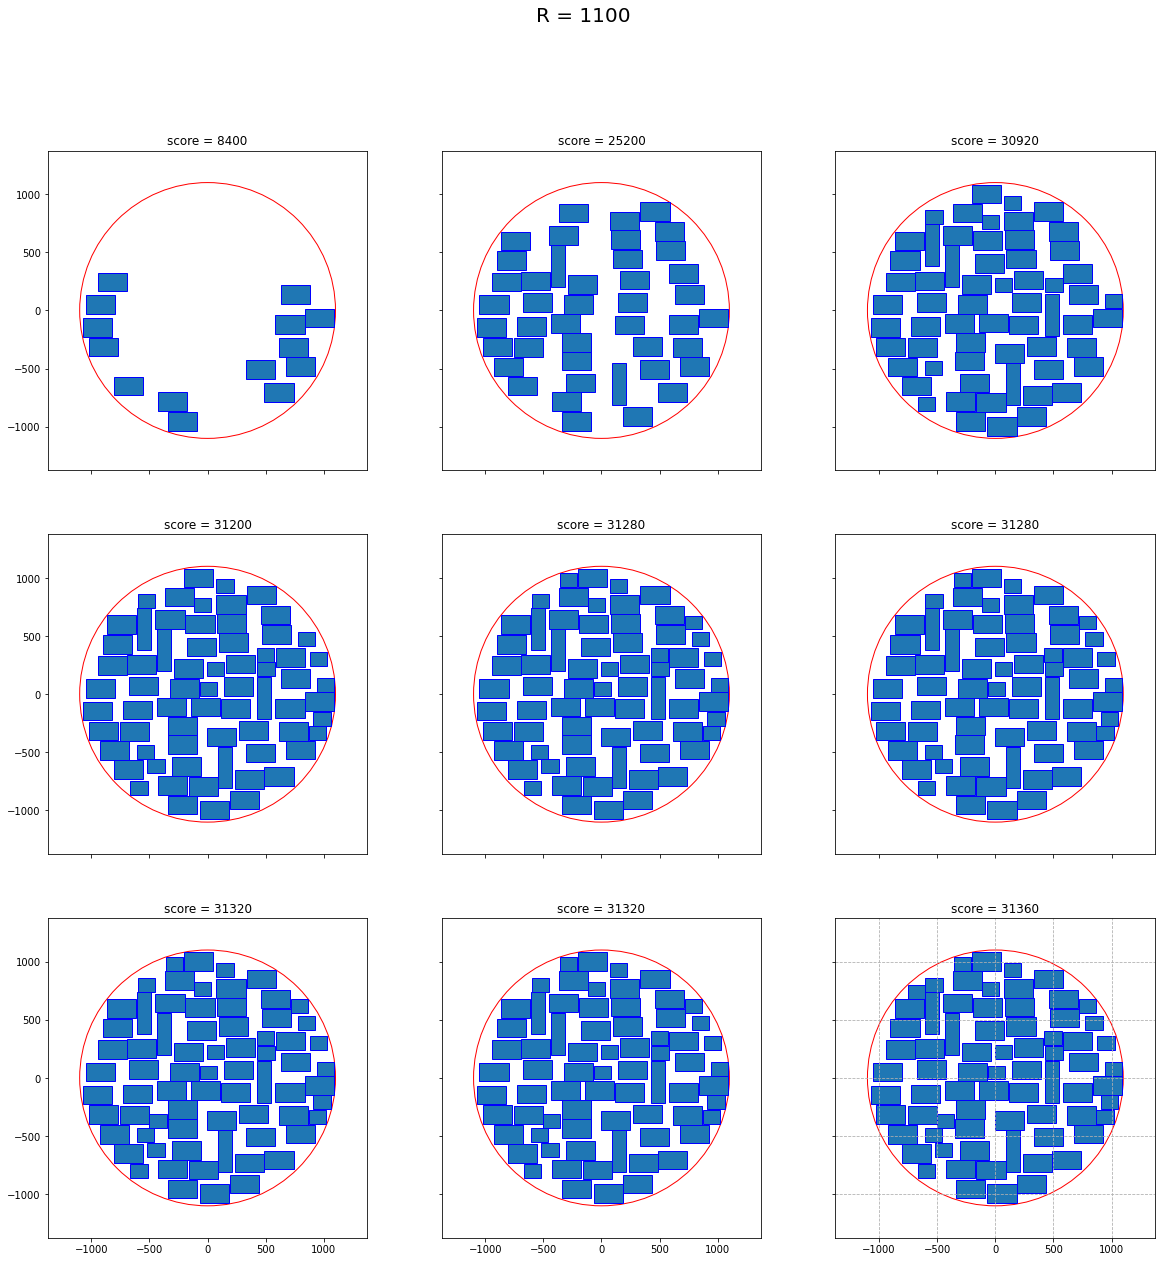

In [24]:
show_observations(solution_1100[::3][:-4] + [solution_1100[-1]], 1100, "R = 1100")

In [25]:
solution_1200 = solve(1200)

Starting solving r1200 ...
iter: 1, best:500
iter: 2, best:1000
iter: 3, best:1000
iter: 4, best:1500
iter: 5, best:2300
iter: 6, best:2300
iter: 7, best:2300
iter: 8, best:2300
iter: 9, best:2300
iter: 10, best:2600
iter: 11, best:2600
iter: 12, best:3200
iter: 13, best:3400
iter: 14, best:3900
iter: 15, best:3900
iter: 16, best:4400
iter: 17, best:4400
iter: 18, best:4400
iter: 19, best:4400
iter: 20, best:4900
iter: 21, best:4900
iter: 22, best:4900
iter: 23, best:5400
iter: 24, best:5400
iter: 25, best:5400
iter: 26, best:5400
iter: 27, best:5900
iter: 28, best:5900
iter: 29, best:5900
iter: 30, best:6400
iter: 31, best:6400
iter: 32, best:6700
iter: 33, best:6700
iter: 34, best:6900
iter: 35, best:7200
iter: 36, best:7200
iter: 37, best:7400
iter: 38, best:7700
iter: 39, best:7700
iter: 40, best:7700
iter: 41, best:8400
iter: 42, best:8700
iter: 43, best:8700
iter: 44, best:8700
iter: 45, best:8700
iter: 46, best:9200
iter: 47, best:9200
iter: 48, best:9400
iter: 49, best:9700
ite

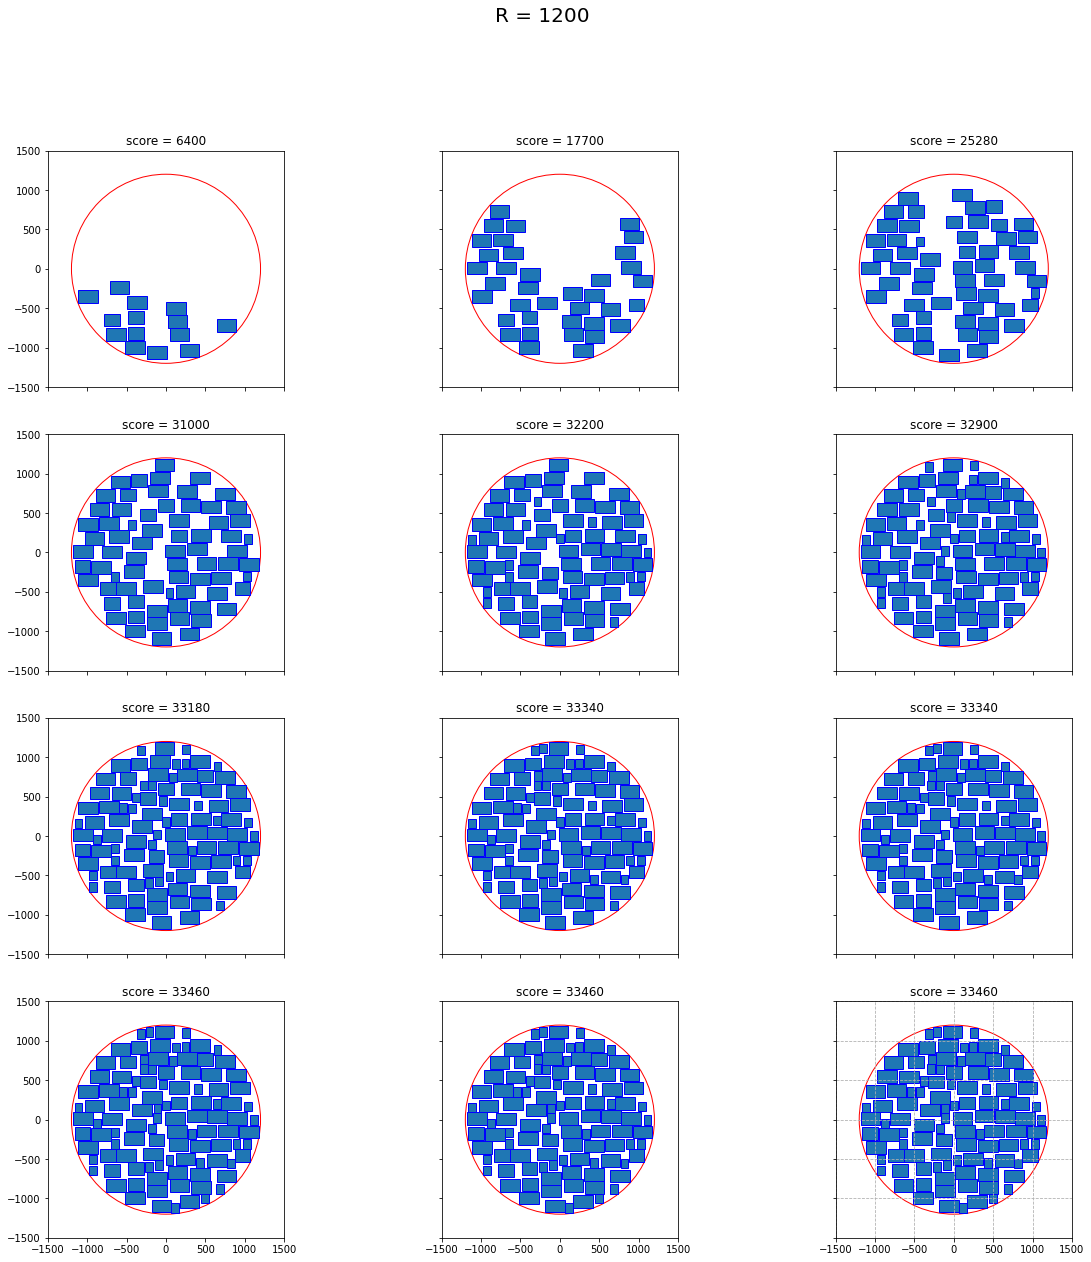

In [26]:
show_observations(solution_1200[::2][:-2] + [solution_1200[-1]], 1200, "R = 1200")

In [27]:
solution_850 = solve(850)

Starting solving r850 ...
iter: 1, best:11000
iter: 2, best:22000
iter: 3, best:22000
iter: 4, best:22000
iter: 5, best:22000
iter: 6, best:33000
iter: 7, best:33000
iter: 8, best:34200
iter: 9, best:45200
iter: 10, best:45200
iter: 11, best:45200
iter: 12, best:45200
iter: 13, best:45200
iter: 14, best:56200
iter: 15, best:56200
iter: 16, best:67200
iter: 17, best:67200
iter: 18, best:67200
iter: 19, best:67200
iter: 20, best:78200
iter: 21, best:78200
iter: 22, best:78200
iter: 23, best:88000
iter: 24, best:89200
iter: 25, best:99000
iter: 26, best:110000
iter: 27, best:110000
iter: 28, best:111200
iter: 29, best:122200
iter: 30, best:132000
iter: 31, best:133200
iter: 32, best:133200
iter: 33, best:143000
iter: 34, best:143000
iter: 35, best:143000
iter: 36, best:154000
iter: 37, best:154000
iter: 38, best:154000
iter: 39, best:154000
iter: 40, best:154000
iter: 41, best:165000
iter: 42, best:176000
iter: 43, best:176000
iter: 44, best:176000
iter: 45, best:176000
iter: 46, best:176

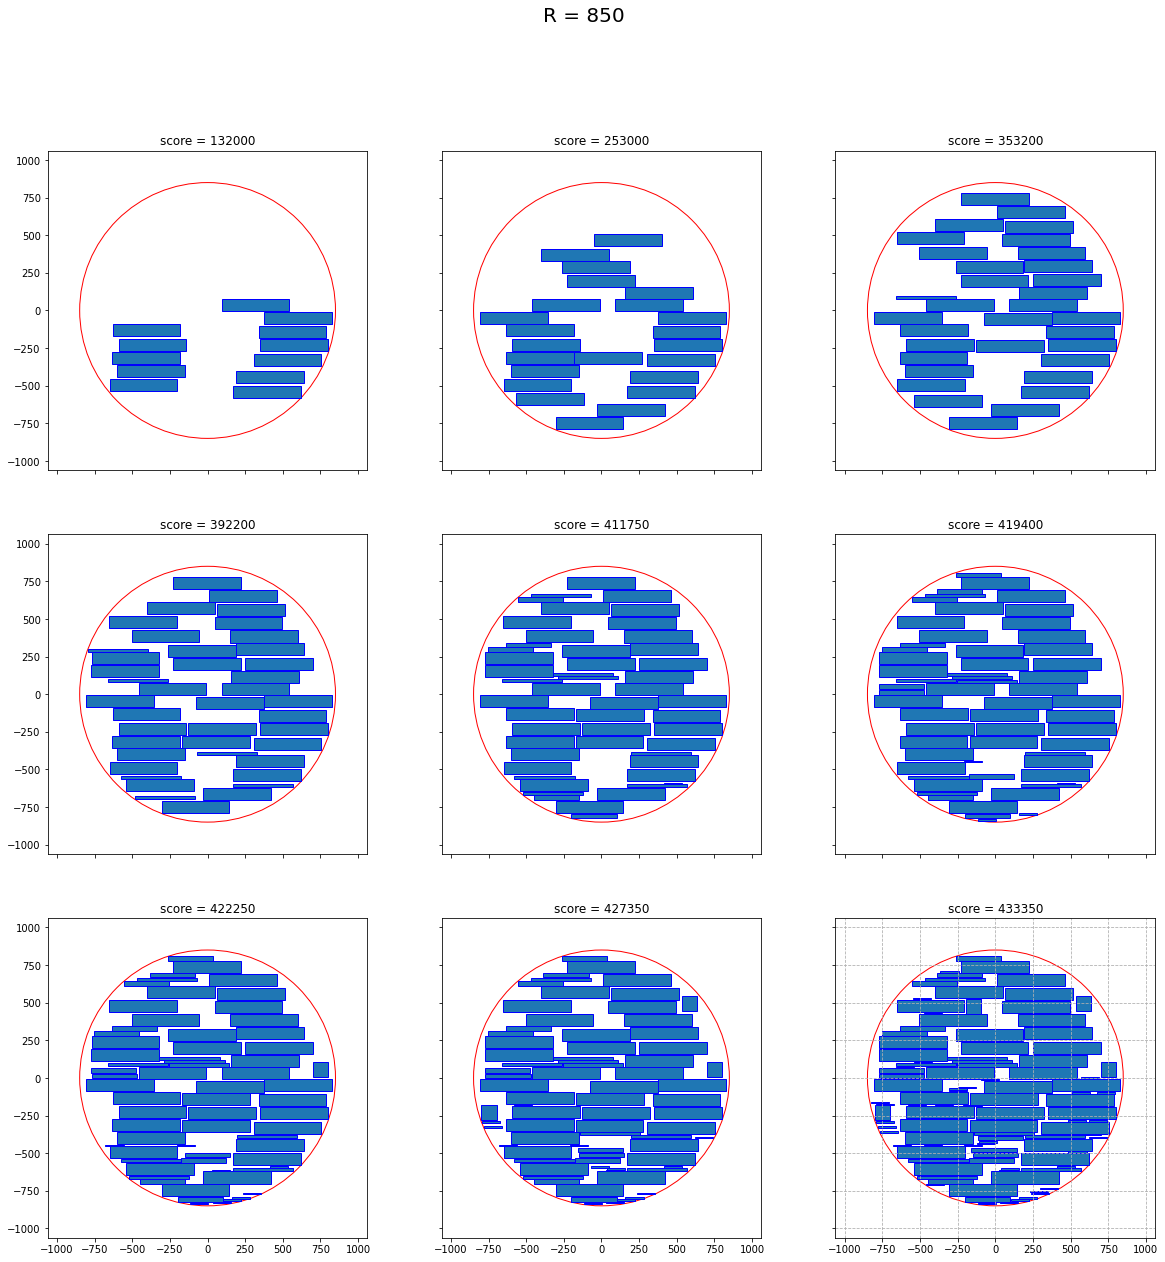

In [29]:
show_observations(solution_850[: -4] + [solution_850[-1]], 850, "R = 850")